In [148]:
import numpy as np
import pandas as pd
import missingno as msno 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="dark")

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

df = pd.read_csv('./multiple_choice_responses_cleaned.csv')
questions_unique = pd.read_csv('./questions_only.csv').rename(columns={"Time from Start to Finish (seconds)": "Qn", "Duration (in seconds)": "question"})

In [134]:
df.head()

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9_Part_1,Q9_Part_2,Q9_Part_3,Q9_Part_4,Q9_Part_5,Q9_Part_6,Q9_Part_7,Q9_Part_8,Q10,Q11,Q12_Part_1,Q12_Part_2,Q12_Part_3,Q12_Part_4,Q12_Part_5,Q12_Part_6,Q12_Part_7,Q12_Part_8,Q12_Part_9,Q12_Part_10,Q12_Part_11,Q12_Part_12,Q13_Part_1,Q13_Part_2,Q13_Part_3,Q13_Part_4,Q13_Part_5,Q13_Part_6,Q13_Part_7,Q13_Part_8,Q13_Part_9,Q13_Part_10,Q13_Part_11,Q13_Part_12,Q14,Q15,Q16_Part_1,Q16_Part_2,Q16_Part_3,Q16_Part_4,Q16_Part_5,Q16_Part_6,Q16_Part_7,Q16_Part_8,Q16_Part_9,Q16_Part_10,Q16_Part_11,Q16_Part_12,Q17_Part_1,Q17_Part_2,Q17_Part_3,Q17_Part_4,Q17_Part_5,Q17_Part_6,Q17_Part_7,Q17_Part_8,Q17_Part_9,Q17_Part_10,Q17_Part_11,Q17_Part_12,Q18_Part_1,Q18_Part_2,Q18_Part_3,Q18_Part_4,Q18_Part_5,Q18_Part_6,Q18_Part_7,Q18_Part_8,Q18_Part_9,Q18_Part_10,Q18_Part_11,Q18_Part_12,Q19,Q20_Part_1,Q20_Part_2,Q20_Part_3,Q20_Part_4,Q20_Part_5,Q20_Part_6,Q20_Part_7,Q20_Part_8,Q20_Part_9,Q20_Part_10,Q20_Part_11,Q20_Part_12,Q21_Part_1,Q21_Part_2,Q21_Part_3,Q21_Part_4,Q21_Part_5,Q22,Q23,Q24_Part_1,Q24_Part_2,Q24_Part_3,Q24_Part_4,Q24_Part_5,Q24_Part_6,Q24_Part_7,Q24_Part_8,Q24_Part_9,Q24_Part_10,Q24_Part_11,Q24_Part_12,Q25_Part_1,Q25_Part_2,Q25_Part_3,Q25_Part_4,Q25_Part_5,Q25_Part_6,Q25_Part_7,Q25_Part_8,Q26_Part_1,Q26_Part_2,Q26_Part_3,Q26_Part_4,Q26_Part_5,Q26_Part_6,Q26_Part_7,Q27_Part_1,Q27_Part_2,Q27_Part_3,Q27_Part_4,Q27_Part_5,Q27_Part_6,Q28_Part_1,Q28_Part_2,Q28_Part_3,Q28_Part_4,Q28_Part_5,Q28_Part_6,Q28_Part_7,Q28_Part_8,Q28_Part_9,Q28_Part_10,Q28_Part_11,Q28_Part_12,Q29_Part_1,Q29_Part_2,Q29_Part_3,Q29_Part_4,Q29_Part_5,Q29_Part_6,Q29_Part_7,Q29_Part_8,Q29_Part_9,Q29_Part_10,Q29_Part_11,Q29_Part_12,Q30_Part_1,Q30_Part_2,Q30_Part_3,Q30_Part_4,Q30_Part_5,Q30_Part_6,Q30_Part_7,Q30_Part_8,Q30_Part_9,Q30_Part_10,Q30_Part_11,Q30_Part_12,Q31_Part_1,Q31_Part_2,Q31_Part_3,Q31_Part_4,Q31_Part_5,Q31_Part_6,Q31_Part_7,Q31_Part_8,Q31_Part_9,Q31_Part_10,Q31_Part_11,Q31_Part_12,Q32_Part_1,Q32_Part_2,Q32_Part_3,Q32_Part_4,Q32_Part_5,Q32_Part_6,Q32_Part_7,Q32_Part_8,Q32_Part_9,Q32_Part_10,Q32_Part_11,Q32_Part_12,Q33_Part_1,Q33_Part_2,Q33_Part_3,Q33_Part_4,Q33_Part_5,Q33_Part_6,Q33_Part_7,Q33_Part_8,Q33_Part_9,Q33_Part_10,Q33_Part_11,Q33_Part_12,Q34_Part_1,Q34_Part_2,Q34_Part_3,Q34_Part_4,Q34_Part_5,Q34_Part_6,Q34_Part_7,Q34_Part_8,Q34_Part_9,Q34_Part_10,Q34_Part_11,Q34_Part_12,min_age,max_age,avg_age,Count,Count%
0,22-24,Male,France,Master’s degree,Software Engineer,"1000-9,999 employees",0,I do not know,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,"30,000-39,999",$0 (USD),Twitter (data science influencers),Unknown,Unknown,"Kaggle (forums, blog, social media, etc)",Unknown,Unknown,Unknown,"Blogs (Towards Data Science, Medium, Analytics...",Journal Publications (traditional publications...,Unknown,Unknown,Unknown,Unknown,Coursera,Unknown,DataCamp,Unknown,Kaggle Courses (i.e. Kaggle Learn),Unknown,Udemy,Unknown,Unknown,Unknown,Unknown,"Basic statistical software (Microsoft Excel, G...",1-2 years,"Jupyter (JupyterLab, Jupyter Notebooks, etc)",RStudio,PyCharm,Unknown,MATLAB,Unknown,Spyder,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,None,Unknown,Python,R,SQL,Unknown,Unknown,Java,Javascript,Unknown,Unknown,MATLAB,Unknown,Unknown,Python,Unknown,Matplotlib,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,CPUs,GPUs,Unknown,Unknown,Unknown,Never,1-2 years,Linear or Logistic Regression,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,None,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,None,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,U

In [38]:
def plot_bar(df, df_column, top_n = 20):
    #The function takes the name of the df and the name of the column as a 'sring'.
    f, ax = plt.subplots(figsize=(6, 6))
    sns.set_color_codes("pastel")
    value_counts = df[df_column].value_counts()[:top_n]
    chart = sns.barplot(x = value_counts, y = value_counts.index, label="Total", data = df, color="b").get_xticklabels()
    try:
        ax.set_title(get_question(df_column), fontweight="bold", ma='center', fontsize = 'large')
    except:
        pass
    ax.set_xlabel("Number of responces")
    plt.show()

In [39]:
# These two functions work with questions that have multiple choices and appear in the dataset as mutiple columns.
# The first function aggregates the responces in a df, and the second one returns barplot.

def aggregate_Qn_cols(from_col, to_col):

    # This function takes a range of column indexes and returns a table on value counts of each responce for the Q

    from_, to_ = from_col, to_col # for some reason, list(cat_columns[from_:to_]) did not work with from_col, to_col
    Qn_columns = list(cat_columns[from_:to_]) # slicing the range of columns that contain the single question with multiple choices
    new_df_name = pd.DataFrame(columns=['counts'])
    for column in Qn_columns: # iterating on each column and concat each count back to new_df_name
        df_Qn_part = df[column].value_counts().reset_index(name='counts')
        new_df_name = pd.concat([new_df_name, df_Qn_part])
    # sorts based on values and drops Unknowns
    new_df_name = new_df_name[new_df_name['index'] != 'Unknown'].sort_values(by=['counts'], ascending=False)
    new_df_name = new_df_name[~new_df_name['index'].astype('str').isin([str(i).zfill(1) for i in range(-1,1000)])].reset_index().drop('level_0', axis = 1)
    return new_df_name

def responce_barplot(df, Qn, width):
    # The Qn name should match with the question name, such as Q12, otherwise the title won't be printed.
    # Qn is a string
    
    # Initialize the matplotlib figure
    f, ax = plt.subplots(figsize=(6, width))

    # Plot the total crashes
    sns.set_color_codes("pastel")
    sns.barplot(x="counts", y="index", data=df,
                label="Total", color="b")

    # Add a legend and informative axis label
    ax.set_xlabel("Number of responces")
    ax.set_ylabel("")
    
    try:
        ax.set_title(get_question(Qn), fontweight="bold", ma='center', fontsize = 'large')
    except:
        pass
    sns.despine(left=True, bottom=True)

In [40]:
cat_columns = df.select_dtypes(include=['object']).columns
Q12 = aggregate_Qn_cols(from_col = 18, to_col = 30)
Q13 = aggregate_Qn_cols(from_col = 30, to_col = 42)
Q16 = aggregate_Qn_cols(from_col = 44, to_col = 56)
Q17 = aggregate_Qn_cols(from_col = 56, to_col = 68)
Q18 = aggregate_Qn_cols(from_col = 68, to_col = 80)
Q20 = aggregate_Qn_cols(from_col = 81, to_col = 93)
Q21 = aggregate_Qn_cols(from_col = 93, to_col = 98)
Q24 = aggregate_Qn_cols(from_col = 100, to_col = 112)
Q25 = aggregate_Qn_cols(from_col = 112, to_col = 120)
Q26 = aggregate_Qn_cols(from_col = 120, to_col = 127)
Q28 = aggregate_Qn_cols(from_col = 120, to_col = 127)
Q31 = aggregate_Qn_cols(from_col = 169, to_col = 181)
Q32 = aggregate_Qn_cols(from_col = 181, to_col = 193)
Q33 = aggregate_Qn_cols(from_col = 193, to_col = 205)
Q34 = aggregate_Qn_cols(from_col = 205, to_col = 217)

In [61]:
df['Q7'] = df['Q7'].replace('20+', '20-70')
new_age = df['Q1'].str.split("-", n = 1, expand = True)
df['min_age'] = new_age[0].astype(int)
df['max_age'] = new_age[1].astype(int)
df['avg_age'] = (df['min_age'] + df['max_age']) / 2

In [153]:
df['Count'] = 1
df['Count%'] = 1 / df.shape[0] * 100

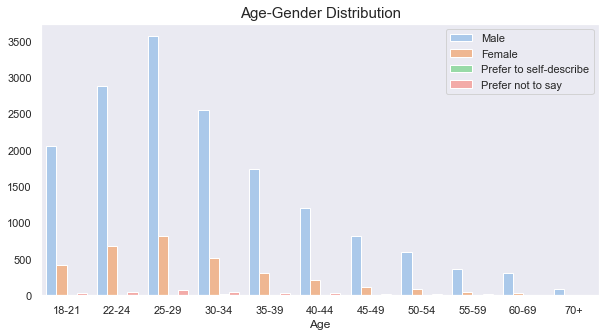

In [149]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))

sns.set_palette(sns.color_palette('pastel'))

sns.countplot(x='Q1', hue='Q2', data=df, 
              order = df['Q1'].value_counts().sort_index().index, 
              ax=ax )
ax.legend()
ax.set_xlabel('Age')
ax.set_ylabel('')
plt.title('Age-Gender Distribution', size=15)
plt.show()

In [115]:
import plotly.express as px

# Grouping it by job title and country
plot_data = df.groupby(['Q5', 'Q3'], as_index=False)['Count%'].sum()

fig = px.line_polar(plot_data, theta='Q5', r='Count%', color='Q3')
fig.show()

In [128]:
import plotly.express as px

# Grouping it by job title and country
plot_data = df.groupby(['Q6', 'Q14'], as_index=False)['Count%'].sum()

fig = px.line_polar(plot_data, theta='Q6', r='Count%', color='Q14')
fig.show()

In [138]:
import plotly.express as px

# Grouping it by job title and country
plot_data = df.groupby(['Q7', 'Q6'], as_index=False)['Count%'].sum()
fig = px.line_polar(plot_data, theta='Q7', r='Count%', color='Q6')

fig.show()

In [155]:
import plotly.express as px

# Grouping it by job title and country
plot_data = df.groupby(['Q5', 'Q11'], as_index=False)['Count'].sum()

fig = px.bar(plot_data, x='Q5', y='Count', color='Q11')
fig.show()